# Ideas for EDA Testing/Analysis

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
main_df = pd.read_pickle('main_df.pkl')

display(main_df.head())
display(main_df.info())

,congress,chamber,rollnumber,icpsr,cast_code,state_abbrev,bioname,bioguide_id,born,nominate_dim1,...,Industry_9,Industry_9_contrib,campaign_year,recent_campaign_year,first_name_alt,percent_campaign_vote,first_year_elected,election_year,tenure,age
5,113,Senate,1,14009,1,MS,"COCHRAN, William Thad",C000567,1937,0.287,...,Pharmaceuticals/Health Products,62000,2012,2008,Thad,0.6144,1978,0,35,76
12,113,Senate,1,14203,1,MT,"BAUCUS, Max Sieben",B000243,1941,-0.212,...,Electric Utilities,287642,2012,2008,Max,0.7292,1978,0,35,72
18,113,Senate,1,14226,1,IA,"GRASSLEY, Charles Ernest",G000386,1933,0.346,...,Hospitals/Nursing Homes,204837,2012,2010,Charles,0.6435,1980,0,33,80
24,113,Senate,1,14230,1,IA,"HARKIN, Thomas Richard (Tom)",H000206,1939,-0.351,...,Insurance,183030,2012,2008,Thomas,0.6266,1984,0,29,74
30,113,Senate,1,14307,1,VT,"LEAHY, Patrick Joseph",L000174,1940,-0.361,...,Real Estate,74900,2012,2010,Patrick,0.6433,1980,0,33,73


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110268 entries, 5 to 306260
Data columns (total 72 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   congress               110268 non-null  int64  
 1   chamber                110268 non-null  object 
 2   rollnumber             110268 non-null  int64  
 3   icpsr                  110268 non-null  int64  
 4   cast_code              110268 non-null  int64  
 5   state_abbrev           110268 non-null  object 
 6   bioname                110268 non-null  object 
 7   bioguide_id            110268 non-null  object 
 8   born                   110268 non-null  int64  
 9   nominate_dim1          110268 non-null  float64
 10  nominate_dim2          110268 non-null  float64
 11  party                  110268 non-null  object 
 12  last_name              110268 non-null  object 
 13  first_name             110268 non-null  object 
 14  date                   110268 non-nu

None

Election year to party line vote

Election year to industry contrib vote

count of bill subjects (will need to shorten)

In [16]:
subjects = []
for i in range(20):
    temp_sub = main_df['subject_{}'.format(i)].unique()
    subjects += list(temp_sub)
    
subjects = [x for x in subjects if pd.notna(x)]   

(17, 'Appropriations')
(16, 'Research and development')
(16, 'Government trust funds')
(15, 'Russia')
(15, 'Executive agency funding and structure')
(15, 'Economic development')
(15, 'Department of Defense')
(14, "Women's health")
(14, "Veterans' medical care")
(14, 'Israel')


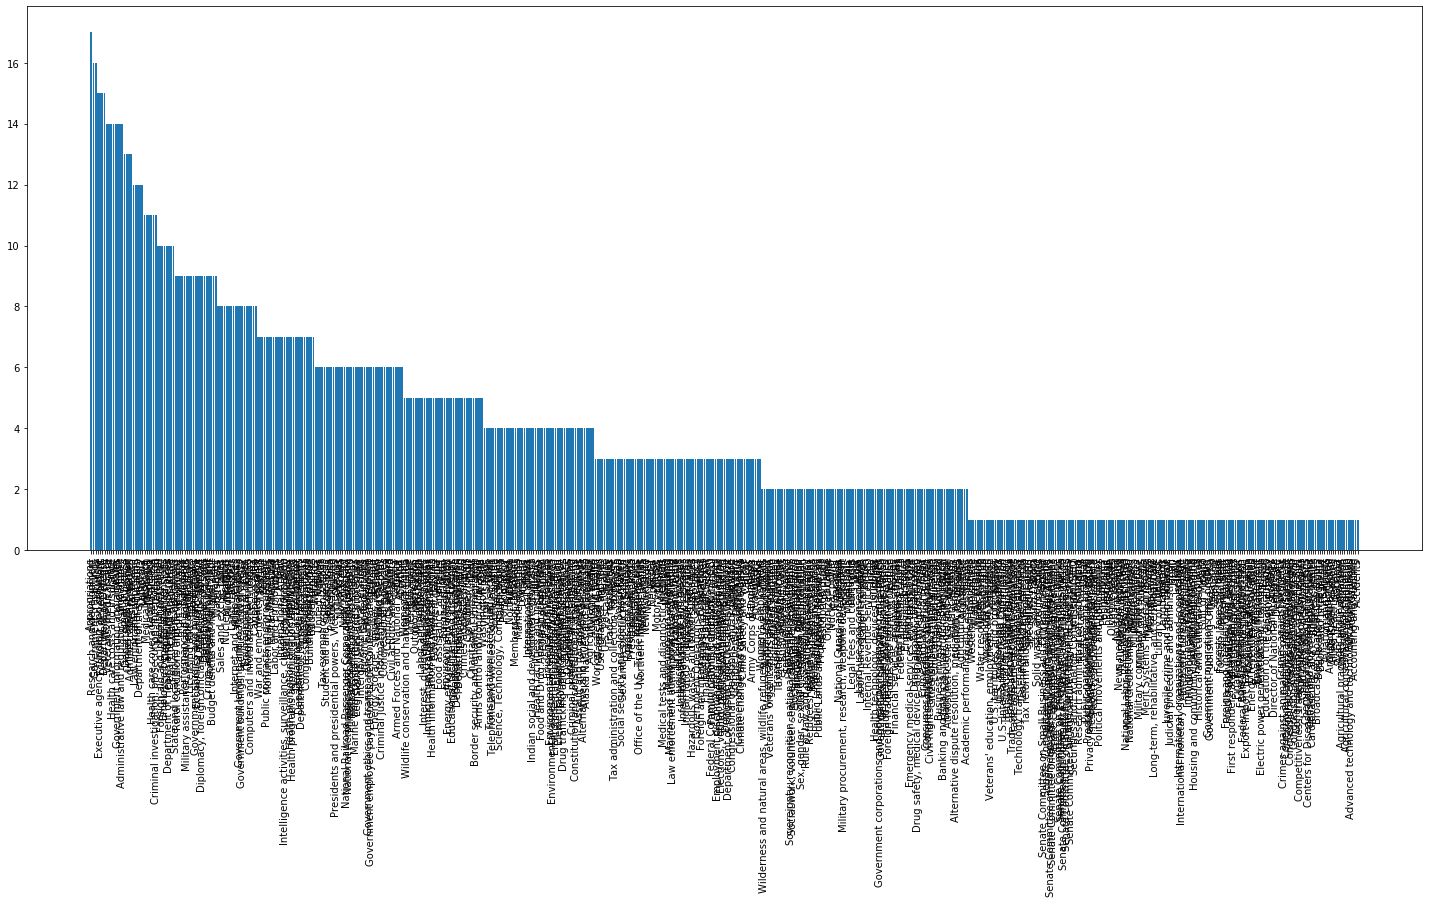

In [15]:
count_subject = []
for i in sorted(set(subjects)):
    count = subjects.count(i)
    if count > 0:
        count_subject.append((count, i))

x = [x[1] for x in sorted(count_subject, reverse=True)]
y = [x[0] for x in sorted(count_subject, reverse=True)]

for i in range(10):
    print(sorted(count_subject, reverse=True)[i])

plt.figure(figsize=(25,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

count of industries

In [18]:
industries = []
for i in range(10):
    temp_industry = main_df['Industry_{}'.format(i)].unique()
    industries += list(temp_industry)
    
industries = [x for x in industries if pd.notna(x)]    

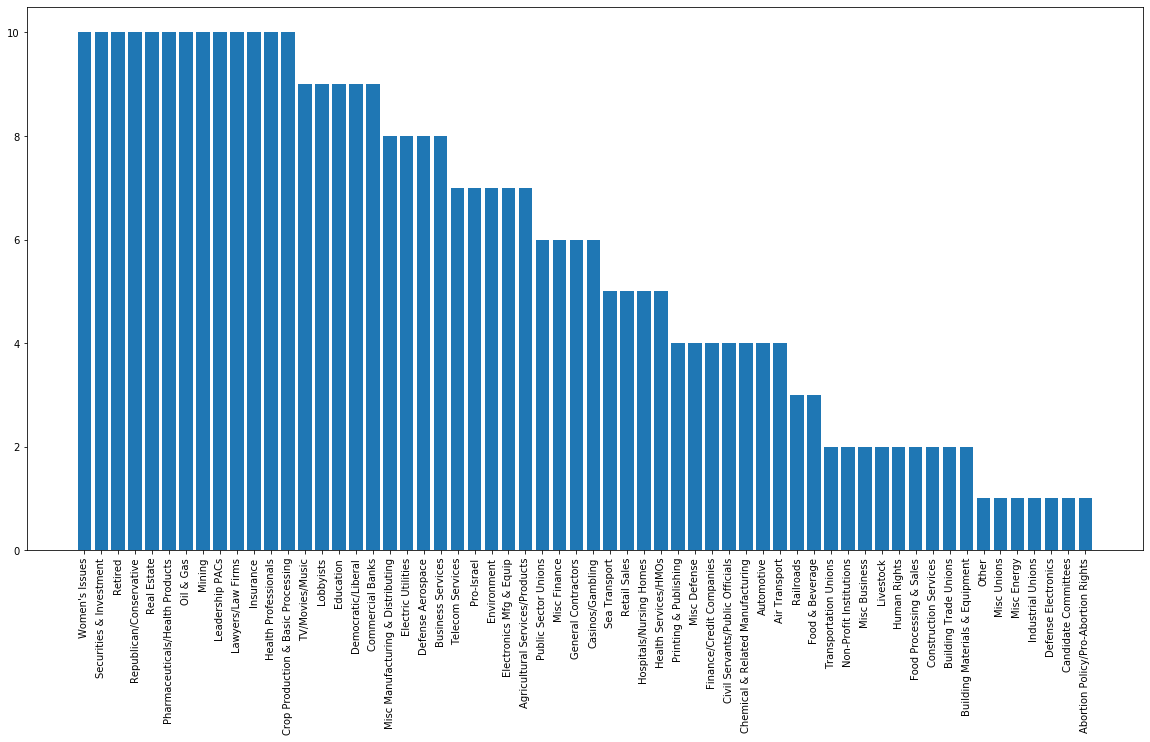

In [19]:
count_industry = []
for i in sorted(set(industries)):
    count_industry.append((industries.count(i), i))
    
sorted(count_industry)

x = [x[1] for x in sorted(count_industry, reverse=True)]
y = [x[0] for x in sorted(count_industry, reverse=True)]

plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

count of industry contribs

how often does each party vote yay on bill subject

how often does each party vote nay on bill subject

vote on bill where subject is in industry contrib

count of year seniority levels

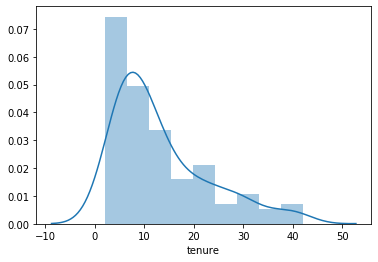

In [22]:
senators = main_df.drop_duplicates('cid', keep='last')
sns.distplot(senators.tenure)

count of bills sponsored by leadership vs. not

vote margin of election vs. percent vote with party

committee bill started in to members of that committee who voted for it

tenure v leadership position, color by party

tenure v dw_nominate, color leadership

distribution of how party line votes are (buckets for degree of partisanship in bill, 0-1, 10 buckets)

how party line is vote v sponsor's party

count committee bills pass/fail rate

count senator sponsor pass/fail rate

age to partisanship

age by party

average age per committee

committee age to likelihood of passage

sponsor's age

contribution dollars v age

END